DAT301 - Project 2 (Stroke Prediction)

By Annicha Jeerasawat

Date:  April 27th, 2024

Introduction

What is a stroke?
A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts. In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death. (“About Stroke | cdc.gov”)

Examples of Stroke Effects to our body
Physical - difficulty with gripping or holding things.
Emotional and Personality - feel worried most of the time.
Communication - difficulty in finding the right words or understanding what others are saying (aphasia or dysphasia).
(Department of Health & Human Services)

Effect of Stroke to Worldwide
Stroke is the leading cause of disability worldwide and the second leading cause of death. The Global Stroke Factsheet released in 2022 reveals that lifetime risk of developing a stroke has increased by 50% over the last 17 years and now 1 in 4 people is estimated to have a stroke in their lifetime. (World Health Organization: WHO)

About this dataset

- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Purpose of this project

The main goal of this project is to find the possible factors that could lead to a stroke.

Getting Started!!

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import .csv file
data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT301\\Dataset\\healthcare-dataset-stroke-data.csv")

In [3]:
# Look at the structure of Stroke Prediction dataset, so there are 5110 observations/row and 12 variables/columns.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [4]:
#Get the top rows in the dataset.
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Seek the insights of data
summary_numerical = data.describe()

summary_categorical = data.describe(include=["object"])

summary = pd.concat([summary_numerical, summary_categorical], axis=1)

print(summary)

                  id          age  hypertension  heart_disease  \
count    5110.000000  5110.000000   5110.000000    5110.000000   
mean    36517.829354    43.226614      0.097456       0.054012   
std     21161.721625    22.612647      0.296607       0.226063   
min        67.000000     0.080000      0.000000       0.000000   
25%     17741.250000    25.000000      0.000000       0.000000   
50%     36932.000000    45.000000      0.000000       0.000000   
75%     54682.000000    61.000000      0.000000       0.000000   
max     72940.000000    82.000000      1.000000       1.000000   
unique           NaN          NaN           NaN            NaN   
top              NaN          NaN           NaN            NaN   
freq             NaN          NaN           NaN            NaN   

        avg_glucose_level          bmi       stroke  gender ever_married  \
count         5110.000000  4909.000000  5110.000000    5110         5110   
mean           106.147677    28.893237     0.048728    

In [6]:
# Data Cleaning Part

''' Since I noticed that the BMI column contains "NaN" values when I observed the structure of the stroke dataset,
then, I decided to replace all missing values by the mean of non-missing BMI values. '''

data["bmi"] = pd.to_numeric(data["bmi"], errors="coerce")

mean_bmi = data["bmi"].mean(skipna=True)

data["bmi"].fillna(mean_bmi, inplace=True)

Data Manipulation Part

In [7]:
# Firstly, I create the new dataframe which contains only gender and stroke columns and select only stroke equals 1 which means that find the male and female who have stroke.

gender_and_stroke = data[data["stroke"] == 1][["gender", "stroke"]]

Exploratory Data Analysis (EDA) & Data Visualization Part

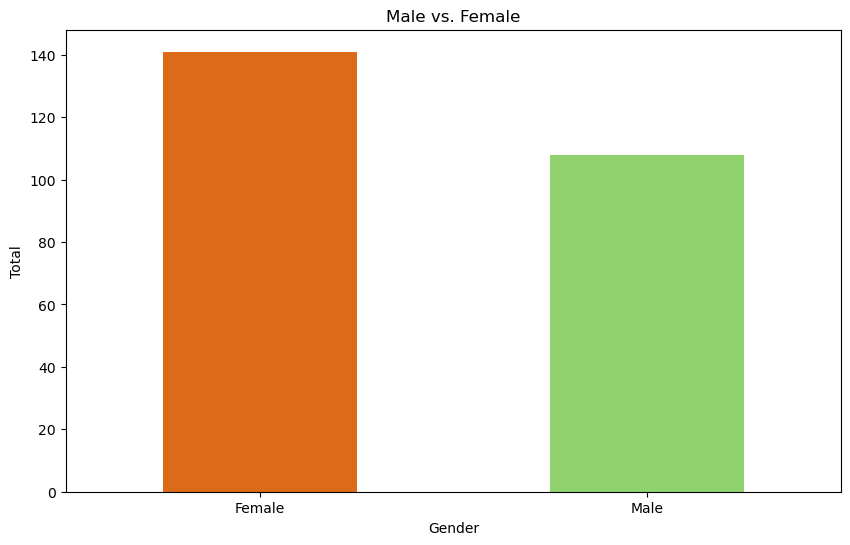

In [8]:
# 1. Which gender has more chance to get stroke?
# Count the total of each gender
gender_counted = gender_and_stroke["gender"].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
gender_counted.plot(kind="bar", color=["#DC6B19", "#90D26D"])
plt.title("Male vs. Female")
plt.xlabel("Gender")
plt.ylabel("Total")
plt.xticks(rotation=0)
plt.show()

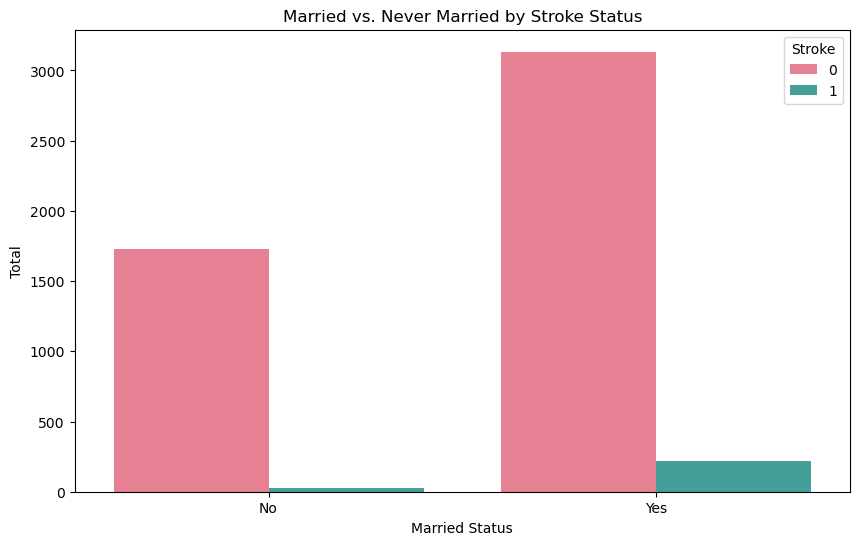

In [9]:
# 2. Which lifestyles have affect to get stroke?
# 2.1 Does married status affect to stroke?
# Group by 'ever_married' and 'stroke', then count occurrences
married_status_count = (data.groupby(["ever_married", "stroke"]).size().reset_index(name="count"))

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=married_status_count, x="ever_married", y="count", hue="stroke", palette="husl")
plt.title("Married vs. Never Married by Stroke Status")
plt.xlabel("Married Status")
plt.ylabel("Total")
plt.xticks(rotation=0)
plt.legend(title="Stroke")
plt.show()

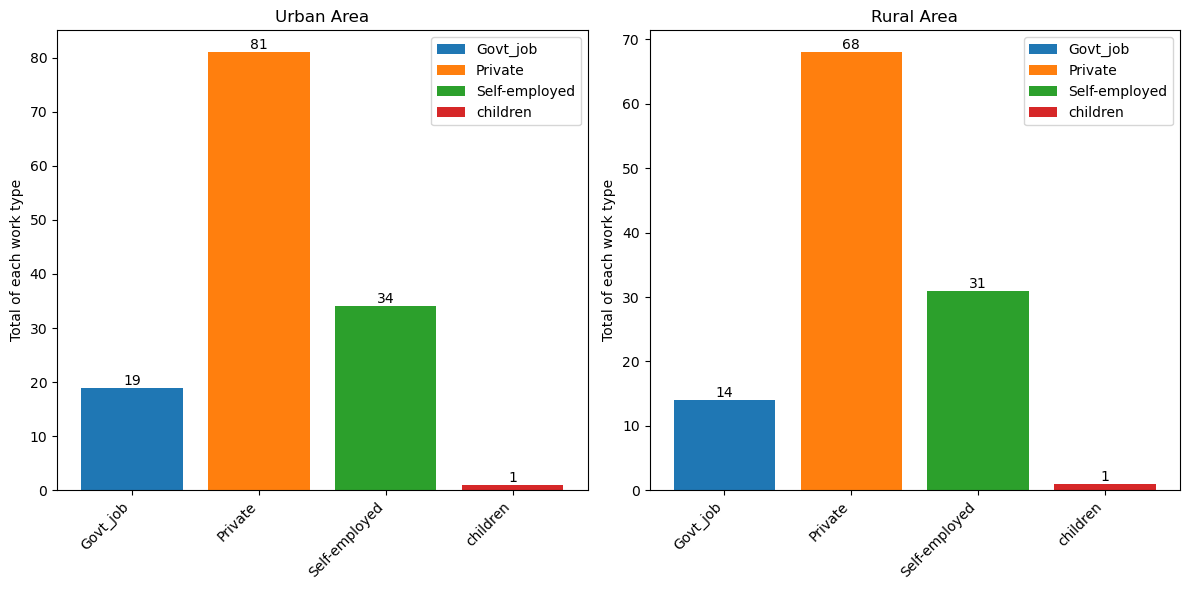

In [10]:
# 2.2 How work types affect to people from urban and rural to get stroke?
# Urban area with stroke and work types grouping
work_type_urban = data[(data["stroke"] == 1) & (data["Residence_type"] == "Urban")]
work_type_urban = work_type_urban.groupby("work_type").size().reset_index(name="n")
work_type_urban["Residence_type"] = "Urban"

# Rural area with stroke and work types grouping
work_type_rural = data[(data["stroke"] == 1) & (data["Residence_type"] == "Rural")]
work_type_rural = work_type_rural.groupby("work_type").size().reset_index(name="n")
work_type_rural["Residence_type"] = "Rural"

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot1 for Urban
for i, (index, row) in enumerate(work_type_urban.iterrows()):
    ax1.bar(i, row["n"], label=row["work_type"])
    ax1.text(i, row["n"], str(row["n"]), ha="center", va="bottom")

ax1.set_xticks(range(len(work_type_urban)))
ax1.set_xticklabels(work_type_urban["work_type"], rotation=45, ha="right")
ax1.set_title("Urban Area")
ax1.set_ylabel("Total of each work type")
ax1.legend()

# Plot2 for Rural
for i, (index, row) in enumerate(work_type_rural.iterrows()):
    ax2.bar(i, row["n"], label=row["work_type"])
    ax2.text(i, row["n"], str(row["n"]), ha="center", va="bottom")

ax2.set_xticks(range(len(work_type_rural)))
ax2.set_xticklabels(work_type_rural["work_type"], rotation=45, ha="right")
ax2.set_title("Rural Area")
ax2.set_ylabel("Total of each work type")
ax2.legend()

plt.tight_layout()

plt.show()

In [11]:
# From the data exploration analysis, people who live in urban areas tend to be stroked more than people who live in rural areas.
#Choose the column Resident_type and stroke in dataframe
stroke_residence = data[["Residence_type", "stroke"]]

# Filter rows where stroke == 1 which points out who have stroke
stroke_residence = stroke_residence[stroke_residence["stroke"] == 1]

# Create frequency table
frequency_table = pd.crosstab(stroke_residence["Residence_type"], columns="Count")

print(frequency_table)

col_0           Count
Residence_type       
Rural             114
Urban             135


In [12]:
# 3. Is smoking affecting to these disease?
# Smoking status vs. Hypertension

# Group by smoking_status, calculate hypertension_count and total_count
smoke_hypertension_counts = data.groupby("smoking_status").agg(hypertension_count=("hypertension", "sum"), total_count=("hypertension", "size"))

# Calculate hypertension_percent
smoke_hypertension_counts["hypertension_percent"] = (smoke_hypertension_counts["hypertension_count"] / smoke_hypertension_counts["total_count"]) * 100

print(smoke_hypertension_counts)

                 hypertension_count  total_count  hypertension_percent
smoking_status                                                        
Unknown                          52         1544              3.367876
formerly smoked                 120          885             13.559322
never smoked                    232         1892             12.262156
smokes                           94          789             11.913815


In [13]:
# Smoking Status vs. Heart Disease

# Group by smoking_status, calculate heart_disease_count and total_count
smoke_heart_disease_counts = data.groupby("smoking_status").agg(heart_disease_count=("heart_disease", "sum"), total_count=("heart_disease", "size"))

# Calculate heart_disease_percent
smoke_heart_disease_counts["heart_disease_percent"] = (smoke_heart_disease_counts["heart_disease_count"] / smoke_heart_disease_counts["total_count"]) * 100

print(smoke_heart_disease_counts)

                 heart_disease_count  total_count  heart_disease_percent
smoking_status                                                          
Unknown                           48         1544               3.108808
formerly smoked                   77          885               8.700565
never smoked                      90         1892               4.756871
smokes                            61          789               7.731305


In [14]:
# Smoking Status vs. Stroke

# Group by smoking_status, calculate stroke_count and total_count
smoke_stroke_counts = data.groupby("smoking_status").agg(stroke_count=("stroke", "sum"), total_count=("stroke", "size"))

# Calculate stroke_percent
smoke_stroke_counts["stroke_percent"] = (smoke_stroke_counts["stroke_count"] / smoke_stroke_counts["total_count"]) * 100

print(smoke_stroke_counts)

                 stroke_count  total_count  stroke_percent
smoking_status                                            
Unknown                    47         1544        3.044041
formerly smoked            70          885        7.909605
never smoked               90         1892        4.756871
smokes                     42          789        5.323194


In [15]:
# 4. Which age gap has high chance to get stroke?
# First, we need to know the age range from collected data

print(data['age'].max())
print(data['age'].min())

82.0
0.08


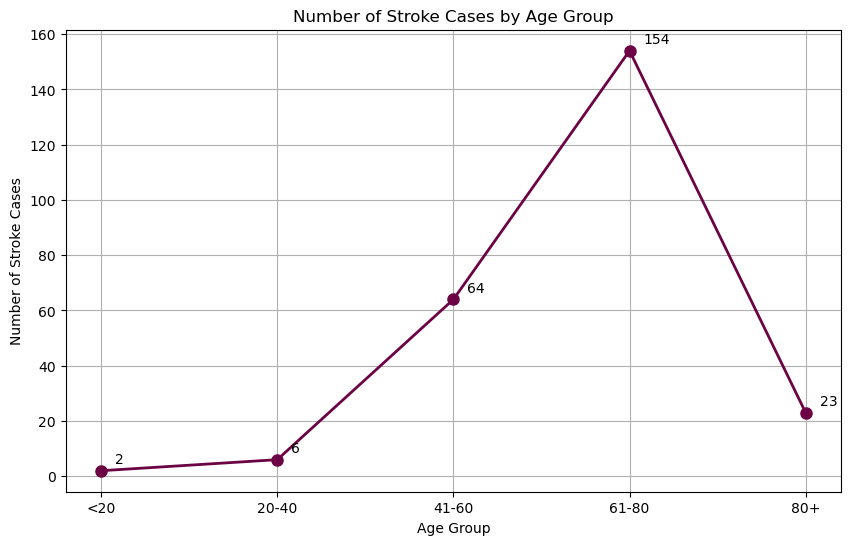

In [16]:
#Make a line plot to show which age range is tending to have a stroke
# Select age and stroke columns where stroke == 1
stroke_age_df = data.loc[data["stroke"] == 1, ["age", "stroke"]]

# Define age groups
bins = [0, 20, 40, 60, 80, float("inf")]
labels = ["<20", "20-40", "41-60", "61-80", "80+"]
stroke_age_df["age_group"] = pd.cut(stroke_age_df["age"], bins=bins, labels=labels)

# Group by age_group and calculate stroke_cases
stroke_age_count = (stroke_age_df.groupby("age_group").size().reset_index(name="stroke_cases"))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    stroke_age_count["age_group"],
    stroke_age_count["stroke_cases"],
    marker="o",
    color="#6C0345",
    linewidth=2,
    markersize=8,
)

for i, txt in enumerate(stroke_age_count["stroke_cases"]):
    plt.annotate(
        txt,
        (stroke_age_count["age_group"][i], stroke_age_count["stroke_cases"][i]),
        xytext=(10, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.xlabel("Age Group")
plt.ylabel("Number of Stroke Cases")
plt.title("Number of Stroke Cases by Age Group")
plt.grid(True)
plt.show()

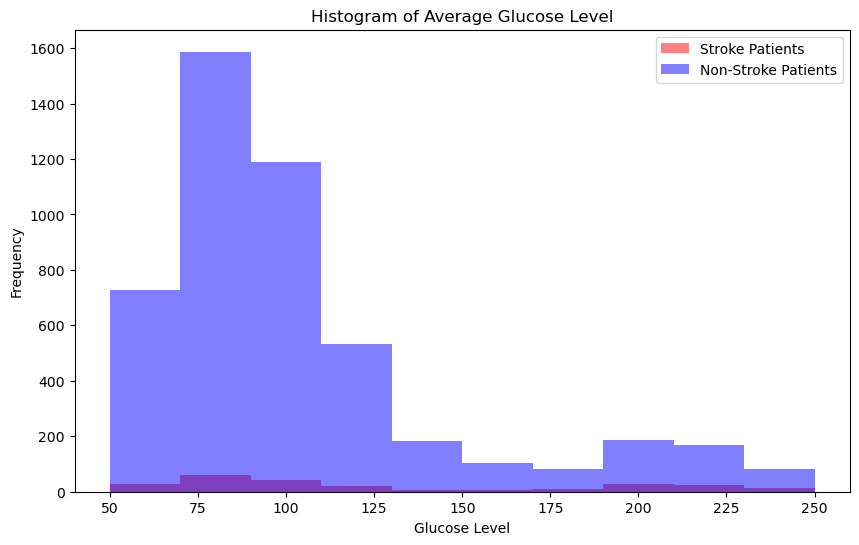

In [17]:
# 5. Which average glucose level and BMI ranges have a high chance to get stroke?

# Filter data for stroke == 1 and avg_glucose_level
glucose_level_stroke = data.loc[data["stroke"] == 1, "avg_glucose_level"]

# Filter data for stroke == 0 and avg_glucose_level
glucose_level_no_stroke = data.loc[data["stroke"] == 0, "avg_glucose_level"]

# Plotting
plt.figure(figsize=(10, 6))

# Histogram for stroke patients
plt.hist(
    glucose_level_stroke,
    bins=10,
    range=(50, 250),
    color="red",
    alpha=0.5,
    label="Stroke Patients",
)

# Histogram for non-stroke patients
plt.hist(
    glucose_level_no_stroke,
    bins=10,
    range=(50, 250),
    color="blue",
    alpha=0.5,
    label="Non-Stroke Patients",
)

# Add labels and title
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.title("Histogram of Average Glucose Level")
plt.legend()
plt.show()

In [18]:
#Get the statistical information of average glucose level for stroke patients

# Filter data for stroke == 1 and avg_glucose_level
glucose_level_stroke = data.loc[data["stroke"] == 1, "avg_glucose_level"]

# Summary of avg_glucose_level
glucose_level_stroke_summary = glucose_level_stroke.describe()
print("Summary of avg_glucose_level for stroke patients:")
print(glucose_level_stroke_summary)

# Find mode of avg_glucose_level
mode_glucose_level_stroke = glucose_level_stroke.mode()[0]
print("\nMode of avg_glucose_level for stroke patients:", mode_glucose_level_stroke)

# In this figure, we could observe that the average of people who got strokes have average glucose around 132.54, and 105.22 is the middle number that appeared in the observation. However, the common average glucose, which mostly appeared in the stroke group, is 101.45

Summary of avg_glucose_level for stroke patients:
count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64

Mode of avg_glucose_level for stroke patients: 101.45


In [19]:
# Get the statistical information of average glucose level for non-stroke patients

# Filter data for stroke == 0 and avg_glucose_level
glucose_level_stroke = data.loc[data["stroke"] == 0, "avg_glucose_level"]

# Summary of avg_glucose_level
glucose_level_stroke_summary = glucose_level_stroke.describe()
print("Summary of avg_glucose_level for non-stroke patients:")
print(glucose_level_stroke_summary)

# Find mode of avg_glucose_level
mode_glucose_level_stroke = glucose_level_stroke.mode()[0]
print("\nMode of avg_glucose_level for non-stroke patients:", mode_glucose_level_stroke)

# In this figure, we could observe that the average of people who didn't get strokes have average glucose around 104.79, and 91.47 is the middle number that appeared in the observation. However, the common average glucose, which mostly appeared in the stroke group, is 93.99
# Obviously, reference from the statistical information, people who are healthy get less average glucose level comapring to the group of stroke patients

Summary of avg_glucose_level for non-stroke patients:
count    4861.000000
mean      104.795513
std        43.846069
min        55.120000
25%        77.120000
50%        91.470000
75%       112.830000
max       267.760000
Name: avg_glucose_level, dtype: float64

Mode of avg_glucose_level for non-stroke patients: 93.88


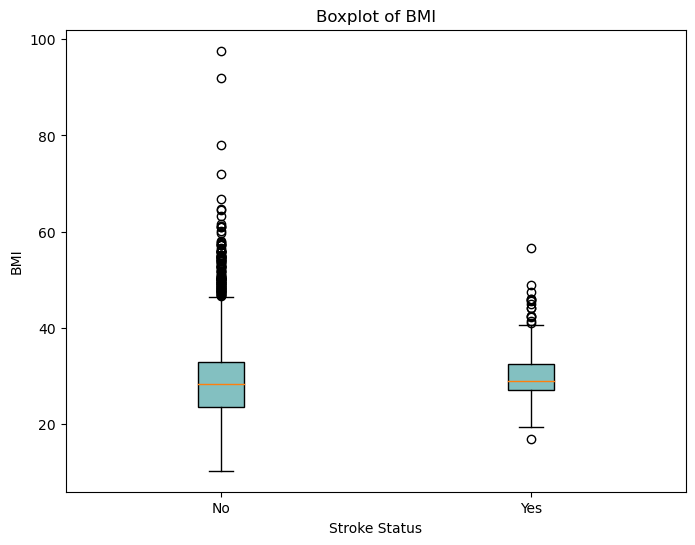

In [20]:
# Create the boxplot for see which group will has wider data distribution

# Separate data into stroke and non-stroke cases
stroke_data = data[data["stroke"] == 1]
no_stroke_data = data[data["stroke"] == 0]

# Extract BMI and remove the missing values
bmi_data = data["bmi"].dropna()

# Plotting
plt.figure(figsize=(8, 6))

# Create boxplot
plt.boxplot(
    [no_stroke_data["bmi"], stroke_data["bmi"]],
    labels=["No", "Yes"],
    patch_artist=True,
    boxprops=dict(facecolor="#83C0C1"),)

plt.xlabel("Stroke Status")
plt.ylabel("BMI")
plt.title("Boxplot of BMI")
plt.show()

# The healthy people who do not get strokes seem to have a wider distribution of information than the other group, like a wider
# range of BMI. Breathtakingly, considering only BMI might not be effective enough for predicting if that person has a high
# chance of stroke.

In [21]:
# Get the statistical information of BMI for stroke patients
# Filter data for stroke == 1 and bmi
bmi_stroke = data.loc[data["stroke"] == 1, "bmi"]

# Summary of bmi for stroke patients
bmi_stroke_summary = bmi_stroke.describe()
print("Summary of BMI for stroke patients:")
print(bmi_stroke_summary)

# Find mode of bmi for stroke patients
mode_bmi_stroke = bmi_stroke.mode()[0]
print("\nMode of BMI for stroke patients:", mode_bmi_stroke)

# From this insight, we found that stroke people have the same mode and median BMI of around 28.89, and their average BMI is 30.22. I noticed that this range of BMI is classified as having higher values than the healthy BMI referenced on the BMI International website (bmi.com) because a BMI greater than 24.9 is considered unhealthy.

Summary of BMI for stroke patients:
count    249.000000
mean      30.217789
std        5.825589
min       16.900000
25%       27.000000
50%       28.893237
75%       32.500000
max       56.600000
Name: bmi, dtype: float64

Mode of BMI for stroke patients: 28.893236911794666


In [22]:
# Get the statistical information of BMI for non-stroke patients
# Filter data for stroke == 0 and bmi
bmi_stroke = data.loc[data["stroke"] == 0, "bmi"]

# Summary of bmi for stroke patients
bmi_stroke_summary = bmi_stroke.describe()
print("Summary of BMI for non-stroke patients:")
print(bmi_stroke_summary)

# Find mode of bmi for stroke patients
mode_bmi_stroke = bmi_stroke.mode()[0]
print("\nMode of BMI for non-stroke patients:", mode_bmi_stroke)
# Again, people who not found the stroke tend to have slightly lower average bmi comparing to stroke patients.

Summary of BMI for non-stroke patients:
count    4861.000000
mean       28.825388
std         7.776203
min        10.300000
25%        23.600000
50%        28.300000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Mode of BMI for non-stroke patients: 28.893236911794666


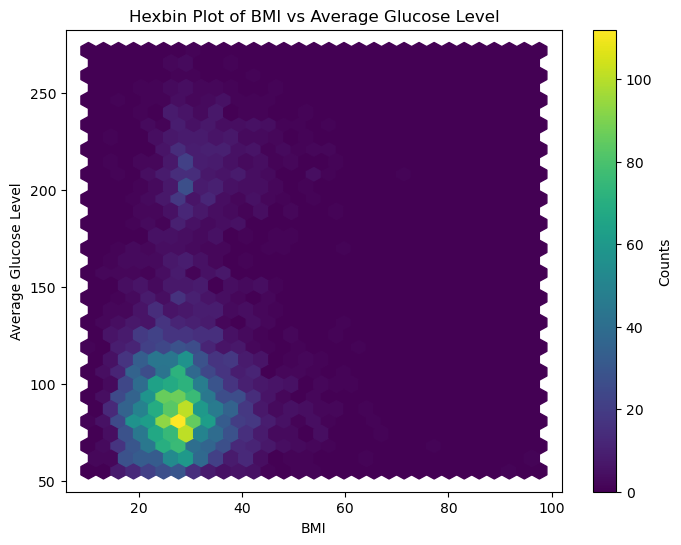

In [23]:
# Later, I hypothesized that there was a relationship between BMI and the average glucose level. Later, I discovered that people with a BMI between approximately 20 and 30 tend to have a glucose level around 50–125, using a matplotlib to plot for explaining.

# Plotting with matplotlib
plt.figure(figsize=(8, 6))

# Create hexbin plot using plt.hexbin
plt.hexbin(data["bmi"], data["avg_glucose_level"], gridsize=30, cmap="viridis")
plt.xlabel("BMI")
plt.ylabel("Average Glucose Level")
plt.title("Hexbin Plot of BMI vs Average Glucose Level")
plt.colorbar(label="Counts")
plt.show()

In [24]:
# 6. From the dataset, Who has more chance to face stroke? Between people aged between 61-80 who got hypertension and people aged between 61-80 who got heart disease?

# Filter data for people aged between 61-80 with hypertension and stroke
hypertension_data = data[
    (data["age"] >= 61)
    & (data["age"] <= 80)
    & (data["hypertension"] == 1)
    & (data["stroke"] == 1)]

# Filter data for people aged between 61-80 with heart disease and stroke
heart_disease_data = data[
    (data["age"] >= 61)
    & (data["age"] <= 80)
    & (data["heart_disease"] == 1)
    & (data["stroke"] == 1)]

# Count the number of stroke patients with hypertension and heart disease
hypertension_stroke_count = hypertension_data["stroke"].sum()
heart_disease_stroke_count = heart_disease_data["stroke"].sum()

# Compare the occurences of the both groups
if hypertension_stroke_count > heart_disease_stroke_count:
    print("People aged between 61-80 with hypertension have a higher chance of facing stroke.\n")
elif hypertension_stroke_count < heart_disease_stroke_count:
    print("People aged between 61-80 with heart disease have a higher chance of facing stroke.\n")
else:
    print("Both groups have an equal chance of facing stroke.\n")

# Print total stroke patients who also have hypertension and heart disease
print("Total stroke patients who also have hypertension:", hypertension_stroke_count)
print("Total stroke patients who also have heart disease:", heart_disease_stroke_count)

People aged between 61-80 with hypertension have a higher chance of facing stroke.

Total stroke patients who also have hypertension: 46
Total stroke patients who also have heart disease: 35


Conclusion

In conclusion, there are many components that could cause a stroke, for example, gender, age, lifestyles, smoking status, and other diseases. According to the data analysis, females have a higher risk of stroke, and people aged 61 to 80 are more likely to have one. I could summarize that hypertension and stress also have a paramount impact on stroke. This realization means that those who have smoked in the past are more likely to get hypertension, heart disease, and stroke. We cannot deny that heart disease is not one of the variables leading to stroke because stroke is found to occur often in patients with heart disease. Except for smoking, there are some other lifestyles that make people have a higher chance of getting strokes. For example, those who work in private industry and reside in metropolitan areas are more likely to suffer a stroke than those who work in other industries and reside in rural areas. We were unable to take into account only one of the two factors—average glucose level and BMI—because both are thought to have been impacted and may have contributed to stroke. People with excessive blood sugar levels and a BMI over the safe range are nearly always at risk for stroke. At this point, I could make the assumption that people who get diabetes have a higher risk of stroke. smoking status, and other diseases. According to the data analysis, females have a higher risk of stroke, and people aged 61 to 80 are more likely to have one. I could summarize that hypertension and stress also have a paramount impact on stroke. From this insight, people who are former smokers have a higher chance of facing hypertension, heart disease, and stroke.According to the number of people who have heart disease, stroke was found in a high amount, so we couldn't deny that heart diseaseis not one of the factors leading to stroke. Except for smoking, there are some other lifestyles that make people have a higher chance of getting strokes. For instance, people who live in urban areas and have private jobs tend to risk stroke more than peoplewho live in rural areas and work in other types of jobs.Average glucose level and BMI are both considered to have been affected,leading to stroke as well, but we couldn't consider only one of them. Stroke is almost always found in people who have a higherBMI than a healthy index and have a high glucose level. At this point, I could make the assumption that people who get diabetes have a higher risk of stroke. This is only a data analysis of collected data from a specific group, so we could saythat stroke could happen to everyone, but if we considered those factors that have a high risk of leading to stroke, Then we could stay healthier and regularly go for a health check.

Reference:
- Stroke Prediction Dataset - <https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data>
- “About Stroke | cdc.gov.” Centers for Disease Control and Prevention, 4 May 2023, <www.cdc.gov/stroke/about.htm>.
- Department of Health & Human Services. “Effects of Stroke.” Better Health Channel, <www.betterhealth.vic.gov.au/health/conditionsandtreatments/effects-of-stroke>.
- World Health Organization: WHO. “World Stroke Day 2022.” World Health Organization, 29 Oct. 2022, <www.who.int/srilanka/news/detail/29-10-2022-world-stroke-day-2022>.
- “International | BMI.com.” BMI.com, www.bmi.com/international.